In [1]:
!pip install chart-studio

     |████████████████████████████████| 71kB 3.1MB/s 


In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import chart_studio.plotly as py
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/bbaigalaa/Predict-energy-consumption/master/dataset/2012_2013_merged_customerID_11.csv", 
               parse_dates=["date"],
               index_col="date")

In [5]:
df.head(3)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC
date,,,,,,,,,,,,,,
2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567
2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547
2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613


#### Adding weekday columns

In [6]:
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['weekday'] = df.index.day_name()
df['day'] = df.index.day
df['hourOfDay'] = df.index.hour

df.sample(1, random_state=0)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,year,month,weekday,day,hourOfDay
date,,,,,,,,,,,,,,,,,,,
2012-11-04 16:30:00,21.98,22.11,0.0,0.0,16.69,0.72,1016.7,3.91,4.93,61,1,0.4,10.003,0.362,2012,November,Sunday,4,16


### Energy consumption by **year**

In [7]:
fig = go.Figure(
    data = go.Scatter(
        x = df.index, 
        y = df['GC'],
        mode="lines"
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "Energy consumption over year", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Time'),
        yaxis = go.layout.YAxis(title = 'Consumption[kWh]')
    )
)

fig.show()

### Energy consumption by months

In [ ]:
df_months=pd.DataFrame(df.groupby('month')['GC'].sum())
df_months['months']=df_months.index
order=df_months["GC"].sort_values(ascending=False)
order

month
August       699.493
July         666.859
January      599.633
June         589.503
September    541.195
October      533.478
March        525.020
December     517.344
May          501.712
April        498.047
November     491.615
February     475.425
Name: GC, dtype: float64

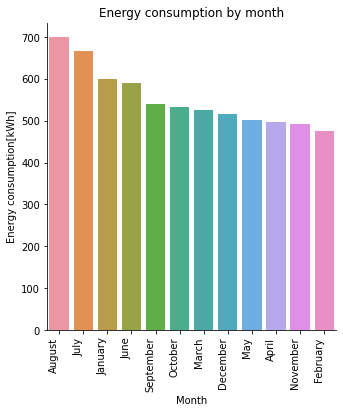

In [ ]:
figure=sns.catplot(
    x="months", y="GC", data=df_months, kind='bar', order=df_months.sort_values("GC", ascending=False).months)
figure.set_xticklabels(rotation=90, horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('Energy consumption[kWh]')
plt.title("Energy consumption by month")
plt.show()

In Australia August is coldest month. Next July. Energy is used for heating.\
But January is hottest month, energy is used for air condition (cooling).\
In February, November energy less used.

### Highest temperature by month

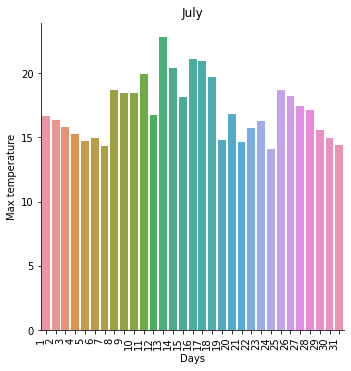

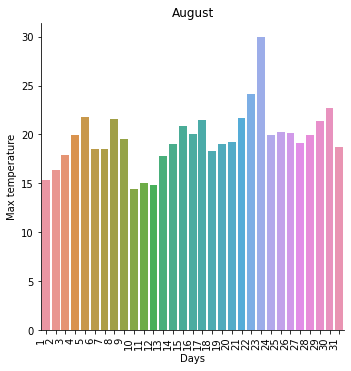

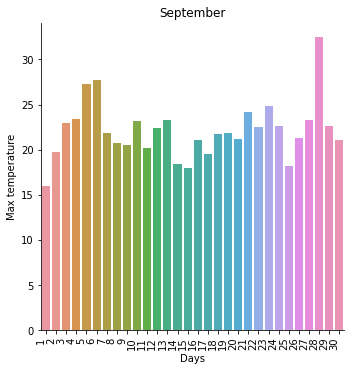

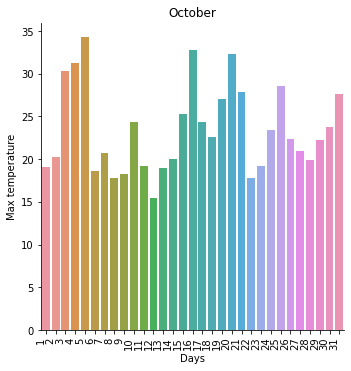

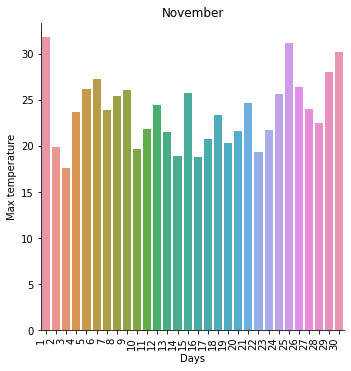

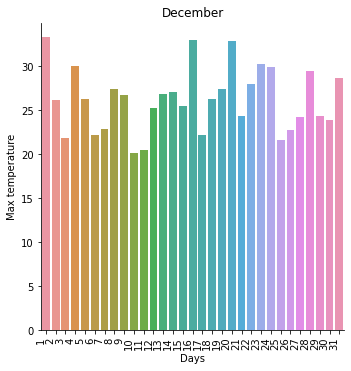

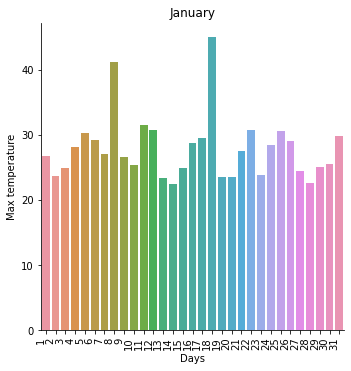

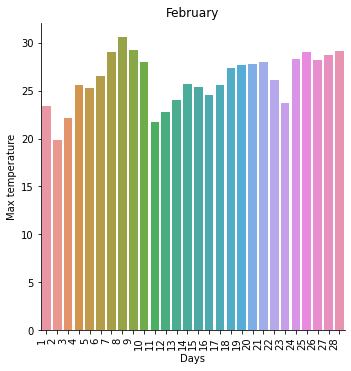

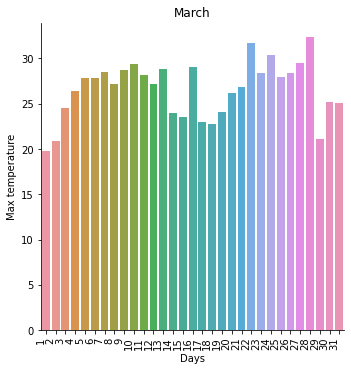

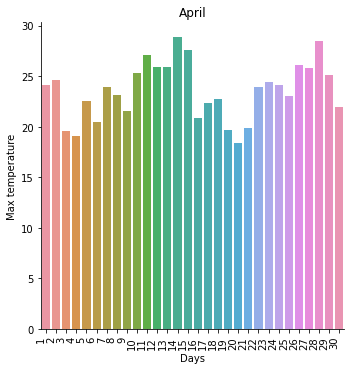

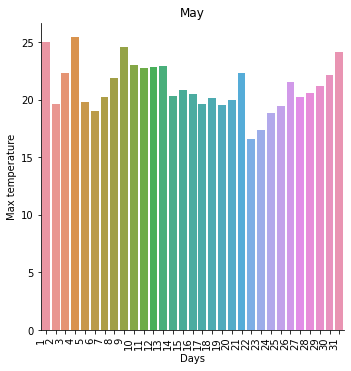

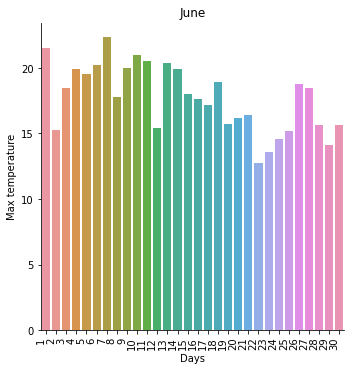

In [ ]:
for i in df["month"].unique():
    mask=df["month"]==i
    df_temp=pd.DataFrame(df[mask].groupby('day')['temperature'].max())
    df_temp['day']=df_temp.index
    figure=sns.catplot(x='day', y='temperature', data=df_temp, kind="bar")
    plt.title(i)
    figure.set_xticklabels(rotation=90, horizontalalignment='right')
    plt.ylabel('Max temperature')
    plt.xlabel('Days')
    plt.show()

#### High and Low temperature average by month

In [ ]:
#Get average high and low temperature of each month
df_high={}
df_low={}

for i in df["month"].unique():
    mask=df["month"]==i
    df_high[i]=df[mask].groupby('day')['temperature'].max().mean()
    df_low[i]=df[mask].groupby('day')['temperature'].min().mean()

In [ ]:
#Merging 2 dictionaries into one DF
dicts = [df_low, df_high]
average_temp=pd.DataFrame.from_records(dicts, index=["low", "high"]).transpose()

In [ ]:
# Plotting Average High and Low Temperature

fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "Low", 
    x=average_temp.index,
    y=average_temp["low"]
    )
)
fig.add_trace(go.Scatter(
    name="High", 
    x=average_temp.index,
    y=average_temp["high"]
  )
)
fig.update_layout(
    xaxis={"title": "Month"}, 
    yaxis={"title": "Temperature[°C]"}, 
    title="Average High and Low Temperature",
)
fig.show()

#### Energy consumption by week

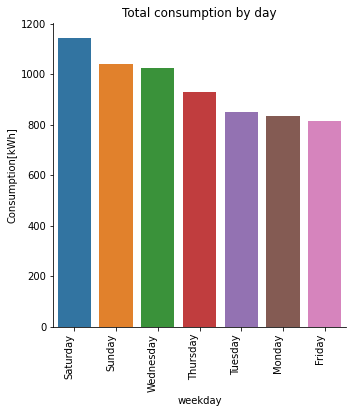

In [ ]:
#Let's see difference in weekday

df_1=pd.DataFrame(df.groupby('weekday')['GC'].sum())
df_1['weekday']=df_1.index
figure=sns.catplot(x='weekday', y='GC', data=df_1, kind='bar', order=df_1.sort_values("GC", ascending=False).weekday)
figure.set_xticklabels(rotation=90, horizontalalignment='right')
plt.ylabel('Consumption[kWh]')
plt.title('Total consumption by day')
plt.show()

In [ ]:
#Show by hour
fig = go.Figure()
temp_dict={}

for i in df['weekday'].unique():
    mask=df['weekday']==i
    temp_dict[i]=df[mask].groupby('hourOfDay')['GC'].sum()
    
    fig.add_trace(go.Scatter(
        name=i, 
        x=temp_dict[i].index,
        y=temp_dict[i].values
        )
    )

fig.update_layout(
    xaxis={"title" : "Hour",
           "tickmode" : "linear"}, 
    yaxis={"title": "Consumption[kWh]"}, 
    title="Total usage by weekday",
)
fig.show()

In [ ]:
#Find coldest and hottest day of year:
min_d=df["temperature"].min()
max_d=df["temperature"].max()
print(df[df["temperature"] == min_d])
print(df[df["temperature"] == max_d])

                     temperature  apparentTemperature  ...  visibility     GC
date                                                   ...                   
2012-08-08 06:00:00         5.45                 5.45  ...       9.988  0.127
2012-08-08 06:30:00         5.45                 5.45  ...       9.988  0.112

[2 rows x 14 columns]
                     temperature  apparentTemperature  ...  visibility     GC
date                                                   ...                   
2013-01-18 12:00:00         45.0                45.67  ...         0.0  0.299
2013-01-18 12:30:00         45.0                45.67  ...         0.0  0.278

[2 rows x 14 columns]


Coldest day is 2012-08-08, hottest day is 2013-01-18.\
Let's plot these day's temperature and humidity.

#### Coldest day

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "Temperature ", 
    x=df["2012-08-08"].index, 
    y=df["2012-08-08"]["temperature"]
    )
)
fig.add_trace(go.Scatter(
    name="Humidity", 
    x=df["2012-08-08"].index, 
    y=df["2012-08-08"]["humidity"]*100,
    yaxis="y2"
  )
)
fig.update_layout(
    xaxis={"title": "Hour"}, 
  yaxis={"title": "Temperature[°C]"}, 
  yaxis2={
      "side": "right", 
      "title": "Humidity[%]", 
      "overlaying": "y"
    },
  title="Coldest days' (8th August) temperature, humidity",
)
fig.show()

#### Hottest day:Temperature vs Humidity

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "Temperature ", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["temperature"]
    )
)
fig.add_trace(go.Scatter(
    name="Humidity", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["humidity"]*100,
    yaxis="y2"
  )
)
fig.update_layout(
    xaxis={"title": "Hour"}, 
    yaxis={"title": "Temperature[°C]"}, 
    yaxis2={
        "side": "right", 
        "title": "Humidity[%]", 
        "overlaying": "y"
        },
  title="Hottest days' (18th January) temperature, humidity"
)
fig.show()

#### Hottest day: Temperature vs Humidity vs Energy consumption

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "Temperature ", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["temperature"]
    )
)
fig.add_trace(go.Scatter(
    name="Humidity", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["humidity"]*100,
    yaxis="y2"
  )
)
fig.add_trace(go.Scatter(
    name="Consumption", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["GC"],
    yaxis="y3"
  )
)
fig.update_layout(
    xaxis={"title": "Hour"}, 
  yaxis={"title": "Temperature[°C]"}, 
  yaxis2={
      "side": "right", 
      "title": "Humidity[%]", 
      "overlaying": "y"
    },
  yaxis3={
      "side": "left", 
      "title": "Consumption[kWh]", 
      "overlaying": "y",
      "position": 0.5
    },
  title="Hottest day: Temperature vs Humidity vs Energy consumption"
)
fig.show()

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "Temperature ", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["temperature"],
    line=dict(color='red')
    )
)
fig.add_trace(go.Scatter(
    name="Consumption", 
    x=df["2013-01-18"].index, 
    y=df["2013-01-18"]["GC"],
    yaxis="y2",
    line=dict(color='green')
  )
)
fig.update_layout(
    xaxis={"title": "Hour"}, 
    yaxis={"title": "Temperature[°C]"}, 
    yaxis2={
      "side": "right", 
      "title": "Consumption[kWh]", 
      "overlaying": "y",
    },
    title="Hottest day: Temperature vs Humidity vs Energy consumption"
    )
fig.show()

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name= "January ", 
    x=df["2013-01"].index, 
    y=df["2013-01"]["GC"],
     line=dict(color='red')
    )
)
fig.add_trace(go.Scatter(
    name="August", 
    x=df["2013-01"].index, #Showing in one line, actual data is August as shown next line
    y=df["2012-08"]["GC"],
    line=dict(color='blue')
  )
)
fig.update_layout(
    xaxis={"title": "Hour"}, 
  yaxis={"title": "Temperature[°C]"}, 
 
  title="Hottest vs Coldest month consumption",
)
fig.show()

In [ ]:
trace0 =  go.Scatter(
    x=df_jan.index,
    y=df_jan["GC"],
    name="January"
)

trace1 = go.Scatter(
    x=df_jul.index,
    y=df_jul["GC"],
    name="July"
)

data = [trace0, trace1]
layout = go.Layout(
        plot_bgcolor='rgba(0,0,0,0)',
        legend=dict(
        x=0,
        y=0.7,
        traceorder='normal',
        font=dict(
            size=12,),
    ),
    annotations=[
        dict(
            x=0,
            y=0.75,
            xref='paper',
            yref='paper',
            text='Trend',
            showarrow=False
        )
    ]
)
fig = go.Figure(data = data,
                layout = layout)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

fig.show()

## By week

In [ ]:
df_jul_1 = df["2012-08-01"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_jul_1.index,
    y=df_jul_1["GC"],
    mode="lines"
))

# Set figure title
fig.update_layout(title_text="Energy consumption in 1st of July")

fig.show()

In [ ]:
df_jan_1 = df["2013-01-01"]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_jan_1.index,
    y=df_jan_1["GC"],
    mode="lines",
))

# Set figure title
fig.update_layout(title_text="Energy consumption in 1st of January")

fig.show()

Merging 2 graphs:

In [ ]:
df_jul_2 = df["2012-07-02"]
df_jan_2 = df["2013-01-02"]

fig = make_subplots(rows=1, 
                    cols=2,
                    # column_widths=[0.6, 0.4],
                    # row_heights=[0.4, 0.6]
                    )

fig.add_trace(
    go.Scatter(
        x=df_jul_2.index, 
        y=df_jul_2["GC"],
        name="July"),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_jan_2.index, 
        y=df_jan_2["GC"],
        name="January"),
        row=1, col=2
)

fig.update_layout(height=400, 
                  width=1100,
                  # legend=["July","January"],
                  title_text="July and January energy consumption")
fig.show()

In [ ]:
df_dec_25 = df["2012-12-25"]
df_jan_2 = df["2013-01-02"]

fig = make_subplots(rows=1, 
                    cols=2,
                    # column_widths=[0.6, 0.4],
                    # row_heights=[0.4, 0.6]
                    )

fig.add_trace(
    go.Scatter(
        x=df_dec_25.index, 
        y=df_dec_25["GC"],
        name="December"),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_jan_2.index, 
        y=df_jan_2["GC"],
        name="January"),
        row=1, col=2
)

fig.update_layout(height=400, 
                  width=1100,
                  title_text="December and January energy consumption")
fig.show()

In [ ]:
#Same data in different shapes:

df_dec_25 = df["2012-12-25"]
df_jan_1 = df["2013-01-01"]

fig = make_subplots(rows=2, 
                    cols=1
                    )
fig.add_trace(
    go.Scatter(
        x=df_dec_25.index, 
        y=df_dec_25["GC"],
        name="25th December(Holiday)"),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_jan_2.index, 
        y=df_jan_2["GC"],
        name="1st January(Holiday)"),
        row=2, col=1
)

fig.update_layout(height=600, 
                  width=1000,
                  title_text="December and January energy consumption")
fig.show()

# September, when school starts:

In [ ]:
#In 2012 1st September is Saturday, we will see 3rd September
#We compare September with August

df_aug_3 = df["2012-08-03"]
df_sep_3 = df["2012-09-03"]

fig = make_subplots(rows=2, 
                    cols=1
                    )
fig.add_trace(
    go.Scatter(
        x=df_aug_3.index, 
        y=df_aug_3["GC"],
        name="3rd August(Summer vacation)"),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_sep_3.index, 
        y=df_sep_3["GC"],
        name="3rd September(School, business new year)"),
        row=2, col=1
)

fig.update_layout(height=600, 
                  width=1000,
                  title_text="December and January energy consumption")
fig.show()